# Ejemplo 02
***Dr Antonio Arista Jalife***

En este ejemplo implementaremos un clasificador de Bayes ingenuo. Si tienes curiosidad, el clasificador de Bayes se basa en probabilidades y es bastante simplón de entender. Primero, importamos las librerías de siempre, y generaremos Blobs para probar.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

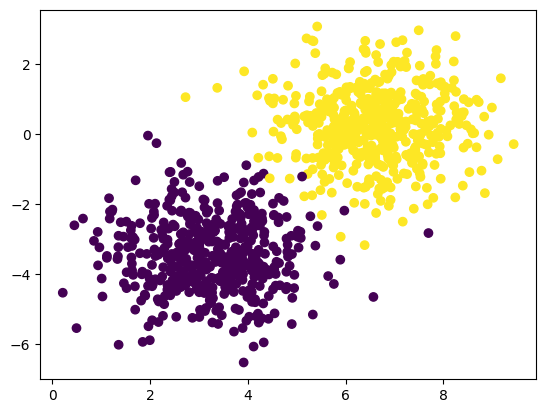

In [2]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

Luego, importaremos de la librería de Naïve Bayes. Se llama Gaussian NB debido a que utiliza funciones gaussianas para calcular las probabilidades. explicar esto sale un poco del *scope* de la clase, pero solo tienes que tener en mente que utiliza campanas de Gauss para estimar probabilidades.

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred = NaiveBayes.predict(x_test) 

Finalmente, utilizando el código de la Sesión 02, evaluaremos que tan bueno es el clasificador.

In [5]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[199   0]
 [  0 201]]
True positives: 201
True negatives: 199
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%
